## 微分散乱断面積のグラフ
### パッケージ

In [9]:
using Plots
using LaTeXStrings

### 定数定義

In [10]:
const hbar = 1.054571817e-34 # 換算Planck定数[J s]
const e = 1.602176634e-19 # 電気素量[C]
const epsilon = 8.8541878128e-12 # 真空の誘電率[F/m]
const Z = 6 # 炭素の原子番号
const N_A = 6.02214076e23 # アボガドロ定数[/mol]
alpha = Z^2 * e^2 / (4pi * epsilon) # [J m]
m_C12 = 12.0e-3 / N_A # C12の質量[kg]
m_C13 = 13.0e-3 / N_A # C13の質量[kg] 

2.1587007873260005e-26

$$
\alpha\colon =\frac{Z^{2}e^{2}}{4\pi\epsilon_{0}}
$$

### 換算関数
- `MeV_to_J`は$\mathrm{MeV}$単位のエネルギーを$\mathrm{J}$単位に変換する関数

In [11]:
MeV_to_J(E) = E * 1.0e6 * e

MeV_to_J (generic function with 1 method)

### Rutherford散乱
$$
\left(\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}\right)_{\text{Lutherford}}\colon =\left(\frac{\alpha}{4E_{\text{CM}}}\right)^{2}\sin^{-4}\frac{\theta}{2}
$$
- 異種粒子のCoulomb散乱
- `sigma1213`は$^{12}\text{C-}^{13}\text{C}$散乱の微分散乱断面積を計算する関数
    - 単位は$\mathrm{m}^{-2}$
    - `\theta`の単位は$\mathrm{rad}$
    - `E_CM`は重心系における運動エネルギーで単位は$\mathrm{J}$

In [12]:
function sigma1213(theta,E_CM)
    (alpha / (4 * E_CM))^2 * sin(theta / 2)^(-4)
end

sigma1213 (generic function with 1 method)

### Mott散乱
$$
\begin{align*}
\left(\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}\right)_{\text{Mott}}\colon 
&= \left|f\left(\theta\right)\right|^{2}+\left|f\left(\pi -\theta\right)\right|^{2}-\frac{1}{2}\left[f^{\ast}\left(\theta\right)f\left(\pi -\theta\right)+f\left(\theta\right)f^{\ast}\left(\pi -\theta\right)\right]\\
&= \left(\frac{\alpha}{4E_{\text{CM}}}\right)^{2}\left[\sin^{-4}\frac{\theta}{2}+\cos^{-4}\frac{\theta}{2}-\sin^{-2}\frac{\theta}{2}\cos^{-2}\frac{\theta}{2}\cos\left(\frac{\alpha}{\hbar v}\log\left(\tan^{2}\frac{\theta}{2}\right)\right)\right]
\end{align*}\\
E_{\text{CM}}=\frac{1}{2}\mu v^{2},\quad\mu\colon =\frac{m_{1}m_{2}}{m_{1}+m_{2}}\stackrel{m_{1}=m_{2}=m}{=}\frac{m}{2}
$$
- spin$\frac{1}{2}$の同種fermionの散乱
- `sigma1313`は$^{13}\text{C-}^{13}\text{C}$散乱の散乱断面積を計算する関数
    - 単位は$\mathrm{m}^{-2}$
    - `\theta`の単位は$\mathrm{rad}$
    - `E_CM`は重心系における運動エネルギーで単位は$\mathrm{J}$

In [13]:
function sigma1313(theta,E_CM)
    x = theta / 2
    s = sin(x)
    c = cos(x)
    t = tan(x)
    v = 2 * sqrt(E_CM / m_C13)
    (alpha / (4 * E_CM))^2 * (s^(-4) + c^(-4) - s^(-2) * c^(-2) * cos(log(t^2) * alpha / (hbar * v)))
end

sigma1313 (generic function with 1 method)

### 同種bosonのCoulomb散乱
$$
\begin{align*}
\left(\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}\right)_{\text{bosons}}\colon
&= \left|f\left(\theta\right)+f\left(\pi -\theta\right)\right|^{2}\\
&= \left|f\left(\theta\right)\right|^{2}+\left|f\left(\pi -\theta\right)\right|^{2}+f^{\ast}\left(\theta\right)f\left(\pi -\theta\right)+f\left(\theta\right)f^{\ast}\left(\pi -\theta\right)\\
&= \left(\frac{\alpha}{4E_{\text{CM}}}\right)^{2}\left[\sin^{-4}\frac{\theta}{2}+\cos^{-4}\frac{\theta}{2}+2\sin^{-2}\frac{\theta}{2}\cos^{-2}\frac{\theta}{2}\cos\left(\frac{\alpha}{\hbar v}\log\left(\tan^{2}\frac{\theta}{2}\right)\right)\right]
\end{align*}\\
E_{\text{CM}}=\frac{1}{2}\mu v^{2},\quad\mu\colon =\frac{m_{1}m_{2}}{m_{1}+m_{2}}\stackrel{m_{1}=m_{2}=m}{=}\frac{m}{2}
$$
- spin$0$の同種bosonの散乱
- `sigma1212`は$^{12}\text{C-}^{12}\text{C}$散乱の散乱断面積を計算する関数
    - 単位は$\mathrm{m}^{-2}$
    - `\theta`の単位は$\mathrm{rad}$
    - `E_CM`は重心系における運動エネルギーで単位は$\mathrm{J}$

In [14]:
function sigma1212(theta,E_CM)
    x = theta / 2
    s = sin(x)
    c = cos(x)
    t = tan(x)
    v = 2 * sqrt(E_CM / m_C12)
    (alpha / (4 * E_CM))^2 * (s^(-4) + c^(-4) + 2 * s^(-2) * c^(-2) * cos(log(t^2) * alpha / (hbar * v)))
end

sigma1212 (generic function with 1 method)

### グラフの出力
- `plot_sigma`は$\text{C-C}$散乱の微分断面積のグラフを描画する関数
    - 横軸$\theta$の単位は度, 縦軸$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}$の単位は$\mathrm{barn}$
    - `E_CM`は重心系における運動エネルギーで単位は$\mathrm{J}$
    - `nuclide1`, `nuclide2`には炭素の核種の原子量(12or13)をInt型で入れる
    - `range`には$\theta$の範囲を度数法で入れる

In [15]:
function plot_sigma(E_CM,nuclide1::Int,nuclide2::Int,range::Tuple{Real,Real})
    n1 = nuclide1
    n2 = nuclide2
    plot(theta->1.0e28 * begin
            if n1 == 12 && n2 == 12
                sigma1212(theta*pi/180,E_CM)
                elseif n1 == 13 && n2 == 13
                sigma1313(theta*pi/180,E_CM)
                elseif n1 + n2 == 12+13 && n1 * n2 == 12*13
                sigma1213(theta*pi/180,E_CM)
            else
                0
            end
            end,
        xlabel = L"\theta^{\circ}",
        ylabel = L"\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}\ \left[\mathrm{barn}\right]",
        label = L"^{%$n1}\mathrm{C-}^{%$n2}\mathrm{C}",
        xlims = range,
        )
end

plot_sigma (generic function with 1 method)

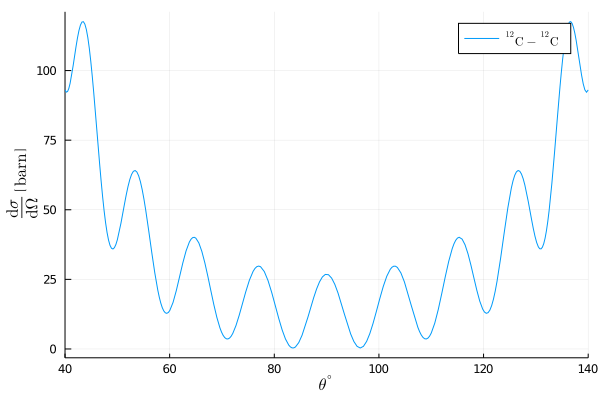

In [19]:
plot_sigma(MeV_to_J(1.0),12,12,(40,140))